In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random as random
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, SMOTENC, SMOTEN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, CondensedNearestNeighbour, OneSidedSelection, NeighbourhoodCleaningRule, InstanceHardnessThreshold, ClusterCentroids
random.seed(0)
# create a KNN model for the merged_filtered_data_crc.csv file
# Load the dataset

data = pd.read_csv("merged.csv")

data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'TBL','fraction_genome_altered','aneuploidy_score','TMB'], axis=1, inplace=True)

In [94]:
def KNN2(target_variable='msi_status', test_size=0.2, random_state=42, neighbors=5, do_cross=False, do_smote=False, type_smote='KMeansSMOTE', weight='uniform'):
    y = data[target_variable]
    X = data.drop(target_variable, axis=1)
    le = LabelEncoder()
    # Fit and transform the features
    X = X.apply(le.fit_transform)
    X.head()

    # Create a KNN model
    knn = KNeighborsClassifier(n_neighbors=neighbors, n_jobs=-1, weights=weight)

    if do_cross == False:
        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


        if do_smote:
            if type_smote == 'ADASYN':
                smote = ADASYN(random_state=random_state, n_jobs=-1)
            elif type_smote == 'RandomOverSampler':
                smote = RandomOverSampler(random_state=random_state)
            elif type_smote == 'KMeansSMOTE':
                smote = KMeansSMOTE(n_jobs=-1, random_state=random_state)
            elif type_smote == 'SMOTE':
                smote = SMOTE(random_state=random_state, n_jobs=-1)
            elif type_smote == 'BorderlineSMOTE':
                smote = BorderlineSMOTE(random_state=random_state, n_jobs=-1)
            elif type_smote == 'SVMSMOTE':
                smote = SVMSMOTE(random_state=random_state, n_jobs=-1)
            elif type_smote == 'SMOTEN':
                smote = SMOTEN(random_state=random_state, n_jobs=-1)
            elif type_smote == 'SMOTENC':
                smote = SMOTENC("auto", random_state=random_state, n_jobs=-1)
            else:
                print(type_smote + ' is not a valid SMOTE type')
            if type_smote != 'none':
                X_train, Y_train = smote.fit_resample(X_train, Y_train)
            
        # Train the model
        knn.fit(X_train, Y_train)
        # Make predictions on the test set
        y_pred = knn.predict(X_test)
        # Evaluate the model
        accuracy = accuracy_score(Y_test, y_pred)
        return accuracy
    else: 
        # Perform cross-validation
        if do_smote:
            smote = SMOTE(random_state=random_state)
            X, y = smote.fit_resample(X, y)
        scores = cross_val_score(knn, X, y, cv=do_cross)
        # Print the cross-validation scores
        return scores.mean()

In [96]:
number_of_neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
cross_validation_list = [2, 4, 6, 8, 10]
training_size = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
all_smotes = [
    # "none", 
    # "BorderlineSMOTE",
    # "SMOTE",
    "SVMSMOTE",
    # "ADASYN",
    # "KMeansSMOTE",
    # "RandomOverSampler"
]

In [97]:
baseline_accuracy_scores1 = []
baseline_kmeans_accuracy_scores1 = []
accuracy_scores_1 = []
for i in all_smotes:
    print(i)
    accuracy_scores = []
    for j in number_of_neighbors_list:
        accuracy = KNN2(neighbors=j, do_smote=True, type_smote = i, test_size=0.4)
        accuracy_scores.append(accuracy)
        if i == "none":
            baseline_accuracy_scores1.append(accuracy)
        if i == "KMeansSMOTE":
            baseline_kmeans_accuracy_scores1.append(accuracy)
    accuracy_scores_1.append((i, accuracy_scores))

SVMSMOTE


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/filter.py:437: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/filter.py:437: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/filter.py:437: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Ver

In [52]:
baseline_accuracy_scores = []
baseline_kmeans_accuracy_scores = []
accuracy_scores_1 = []
for i in all_smotes:
    print(i)
    accuracy_scores = []
    for j in number_of_neighbors_list:
        accuracy = KNN2(neighbors=j, do_smote=True, type_smote = i)
        accuracy_scores.append(accuracy)
        if i == "none":
            baseline_accuracy_scores.append(accuracy)
        if i == "KMeansSMOTE":
            baseline_kmeans_accuracy_scores.append(accuracy)
    accuracy_scores_1.append((i, accuracy_scores))

none
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
KMeansSMOTE


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

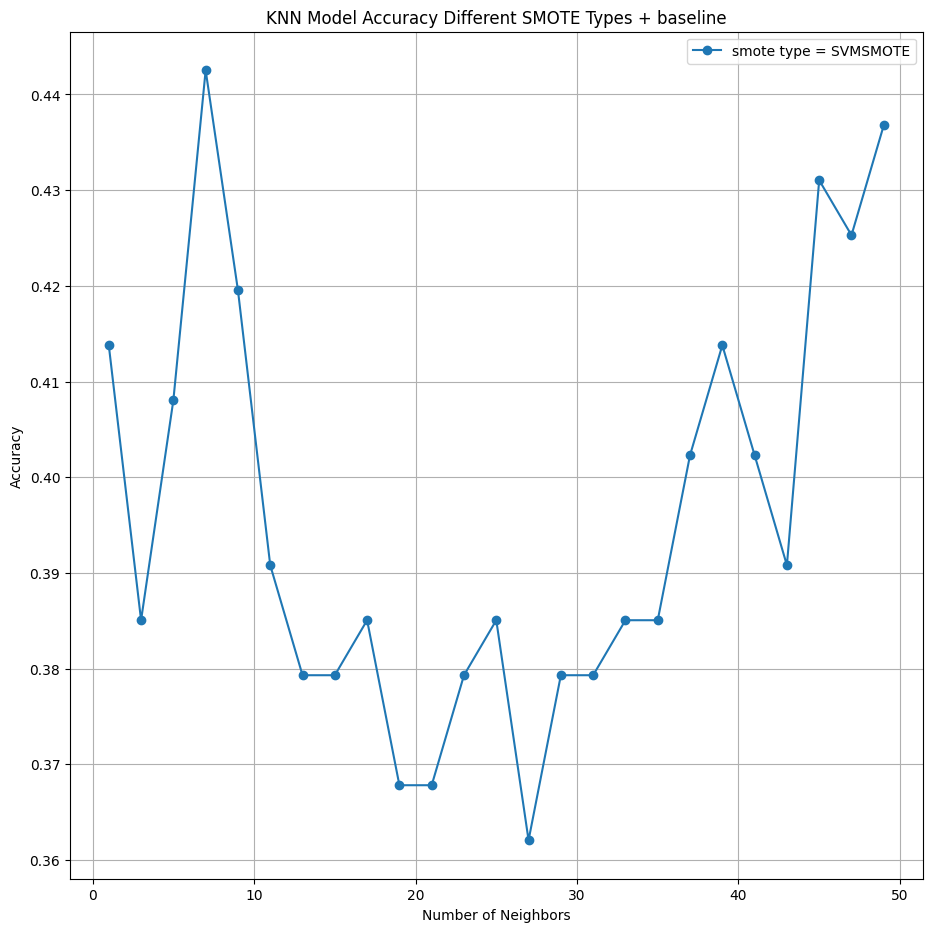

In [98]:
fig = plt.figure(figsize=(11, 11))
fig = fig.add_subplot(111)
for i in range(len(accuracy_scores_1)):
    fig.plot(number_of_neighbors_list, accuracy_scores_1[i][1], marker='o', label="smote type = {}".format(accuracy_scores_1[i][0]))
fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy Different SMOTE Types + baseline')
fig.legend()
fig.grid(True)

In [48]:
accuracy_scores_2 = []
for j in cross_validation_list:
    print("cross size = ", j)
    accuracy_scores = []
    for i in number_of_neighbors_list:
        accuracy = KNN2(neighbors=i, do_smote=True, do_cross=j)
        accuracy_scores.append(accuracy)
    accuracy_scores_2.append((j, accuracy_scores))

cross size =  2
cross size =  4
cross size =  6
cross size =  8
cross size =  10


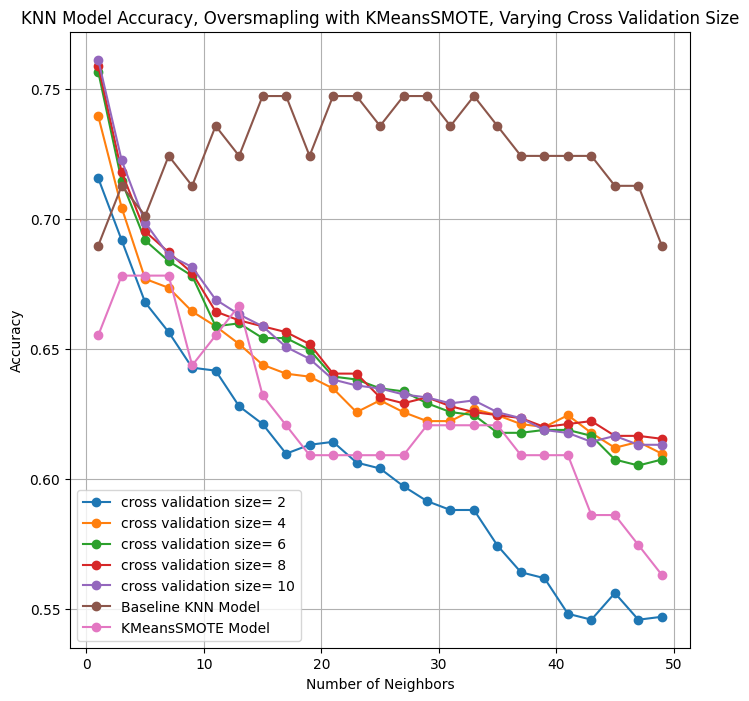

In [55]:
fig = plt.figure(figsize=(8, 8))
fig = fig.add_subplot(111)
for i in range(len(accuracy_scores_2)):
    fig.plot(number_of_neighbors_list, accuracy_scores_2[i][1], marker='o', label="cross validation size = {}".format(accuracy_scores_2[i][0]))
fig.plot(number_of_neighbors_list, baseline_accuracy_scores, marker='o', label="Baseline KNN Model")
fig.plot(number_of_neighbors_list, baseline_kmeans_accuracy_scores, marker='o', label="KMeansSMOTE Model")

fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy, Oversmapling with KMeansSMOTE, Varying Cross Validation Size')
fig.legend()
fig.grid(True)

In [92]:
accuracy_scores_3 = []
for j in training_size:
    print("test size = ", j)
    accuracy_scores = []
    for i in number_of_neighbors_list:
        accuracy = KNN2(neighbors=i, test_size=j, do_smote=True)
        accuracy_scores.append(accuracy)
    accuracy_scores_3.append((j, accuracy_scores))

test size =  0.2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

test size =  0.3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

test size =  0.4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

test size =  0.5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

test size =  0.6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

test size =  0.7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

test size =  0.8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

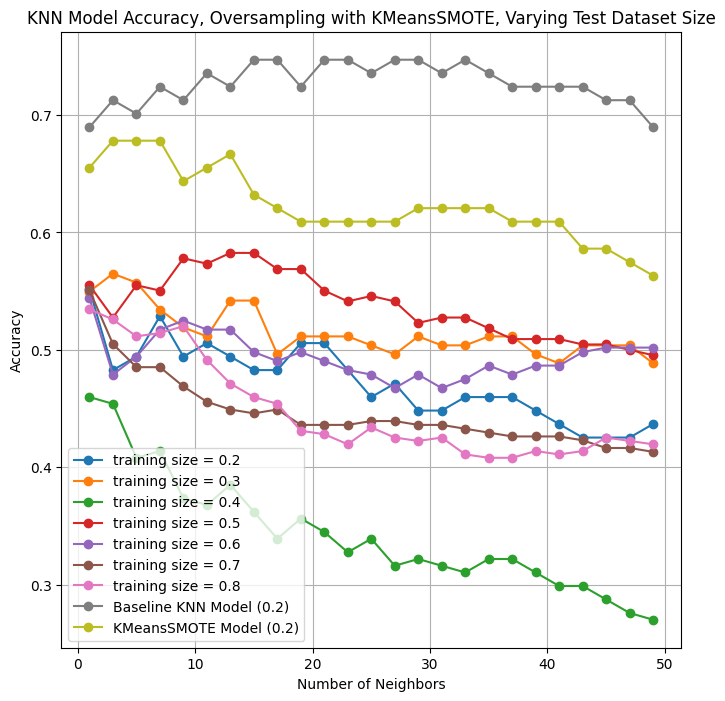

In [93]:
fig = plt.figure(figsize=(8, 8))
fig = fig.add_subplot(111)
for i in range(len(accuracy_scores_3)):
    fig.plot(number_of_neighbors_list, accuracy_scores_3[i][1], marker='o', label="training size = {}".format(accuracy_scores_3[i][0]))
fig.plot(number_of_neighbors_list, baseline_accuracy_scores, marker='o', label="Baseline KNN Model (0.2)")
fig.plot(number_of_neighbors_list, baseline_kmeans_accuracy_scores, marker='o', label="KMeansSMOTE Model (0.2)")
fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy, Oversampling with KMeansSMOTE, Varying Test Dataset Size')
fig.legend()
fig.grid()

In [ ]:
accuracy_scores_4 = []
for j in [0.2, 0.3, 0.4]:
    for k in [6, 8, 10]:
        for i in number_of_neighbors_list:
            accuracy = KNN2(neighbors=i, test_size=j, type_smote='KMeansSMOTE', do_cross=k)
            accuracy_scores.append(accuracy)
accuracy_scores_4.append((j, accuracy_scores))

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig = fig.add_subplot(111)
for i in range(len(accuracy_scores_3)):
    fig.plot(number_of_neighbors_list, accuracy_scores_3[i][1], marker='o', label="training size= {}".format(accuracy_scores_3[i][0]))
fig.plot(number_of_neighbors_list, baseline_accuracy_scores, marker='o', label="Baseline KNN Model (0.8)")
fig.plot(number_of_neighbors_list, baseline_kmeans_accuracy_scores, marker='o', label="KMeansSMOTE Model (0.8)")
fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy, Oversampling with KMeansSMOTE, Varying Training Dataset Size')
fig.legend()
fig.grid()